<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Analysis Report to Management (Individual Assignment)</h2>
***
DAT-5303 | Machine Learning<br>
<strong>Sai Pruthvi Konduru Venkata</strong><br> Student of Business Analytics<br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
<h2>Purpose of this Script</h2><br>
Develop a consolidated report containing top actionable insights from the case as well as the final revenue and cross-sell promotion models. This script is designed to achieve the objective of this assignment. It utilizes the Apprentice_Chef_Dataset.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Analysis Report</h2><br>

<strong>Apprentice Chef, Inc.</strong><br>

Apprentice Chef is developed for those busy professionals that have little to no skills in the kitchen. They offer a wide selection of daily-prepared gourmet meals that are delivered directly to the customer. Apprentice Chef has been serving busy customers across the San Francisco Bay Area from the past three years. The executives wanted to recognize how much revenue to expect from each customer within their first year of orders. To diversify their revenue stream, they have launched Halfway There, a cross-selling promotion where subscribers receive a half bottle of wine from a local California vineyard every Wednesday. The firm is concerned to know which customers will subscribe to this service (Kusterer, 2021). <br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Insights related to revenue</h2><br>
    * The highest total number of meals ordered by a customer is 493, and the highest number of unique meals ordered is only 19. The correlation matrix of unique meals ordered is -0.06. The correlation means that even if we have high revenue generated, it does not come from unique meals but regular meals. We must try and improve the culinary menu of unique meals to influence the customer to eat something different and unique at least once a week. This increase in ordering unique meals would help grow revenue, as unique meals are expensive than regular meals.<br><br>
    * Most customers order from a browser on desktops or personal computers rather than an application on the mobile phone. The correlation matrix of mobile logins is -0.02, which means that the customers prefer using our website's desktop user interface than that of a mobile application while placing an order. So, we have to design our mobile app to offer better personalization and perform actions much quicker than the website. There were times when push notifications have delivered click-through rates of up to 40%, which is exceptionally high for the marketing department. With the ease of sending notifications, we can get even closer to customers by sending one-tap orders and special promo advertisements (Deshdeep, 2020).<


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Insights related to cross-sell promotion</h2><br>
    - Professional customers are more likely to subscribe to the cross-selling promotion than the other email groups. These customers enjoy their meal with wine in a sophisticated manner, even halfway through the workweek. The correlation matrix of customers ordering food through professional emails for subscribing to the cross-sell promotion is 0.19.<br><br>
    - The junk email group customers have the highest negative correlation of -0.28. Offering these customers special discounts and promo codes is the right way of generating revenue. Giving special price for subscribing to our promotion would help grow customers in the junk email group.<br><br>
    - Customers who have mentioned their tastes and preferences in their profile have higher probable chances of subscribing to the promotion. Adding tastes and preferences into their profile is optional to the customer. The company must make this feature mandatory and gather information about each customer's taste and food preferences. The company can use this information to provide suggestions to the customers about which wine best suits their taste. By doing so, customers would get encouraged into subscribing to our promotion.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Model Performance</h2><br>
    1) The highest R-square value constructed on the revenue model is 0.819 obtained from OLS Regression.<br>
    2) The tuned random forest model predicting the cross-sell promotion has the highest AUC score of 0.774.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Conclusion</h2><br>
Increasing the duration of meal preparation instructions and growing the median rating of meals by each customer would certainly preserve customers. Growing the customer base and satisfying existing customers is essential and is one of the biggest challenges in growing revenue. Halfway There promotion is an excellent effort by the firm to diversify its revenue stream. The customers ordering food from junk emails are least interested in subscribing to the promotion. Luring junk email users in the form of occasional discounts and special promos would drive them towards subscribing to our promotion.<br><br>

In [1]:
# importing libraries
import pandas as pd                      # data science essentials
import matplotlib.pyplot as plt          # data visualization
import seaborn as sns                    # enhanced graphical output

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

In [2]:
df_corr = chef.corr().round(2)
df_corr['REVENUE'].sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
LARGEST_ORDER_SIZE             0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
MOBILE_NUMBER                  0.03
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
TASTES_AND_PREFERENCES         0.01
CANCELLATIONS_BEFORE_NOON      0.01
WEEKLY_PLAN                    0.01
REFRIGERATED_LOCKER           -0.00
EARLY_DELIVERIES              -0.00
CROSS_SELL_SUCCESS             0.00
LATE_DELIVERIES               -0.01
PACKAGE_LOCKER                -0.01
MOBILE_LOGINS                 -0.02
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

In [3]:
df_corr = chef.corr().round(2)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PC_LOGINS                      0.04
MASTER_CLASSES_ATTENDED        0.04
PACKAGE_LOCKER                 0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
LARGEST_ORDER_SIZE             0.02
EARLY_DELIVERIES               0.02
TOTAL_MEALS_ORDERED            0.01
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
LATE_DELIVERIES                0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
CANCELLATIONS_AFTER_NOON      -0.05
MOBILE_LOGINS                 -0.05
Name: CROSS_SELL_SUCCESS, dtype: float64

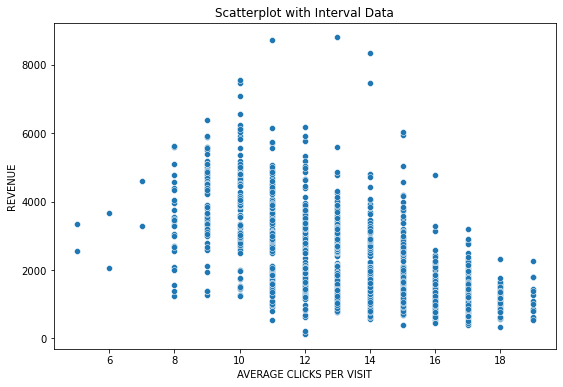

In [4]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))

# developing a scatterplot
sns.scatterplot(x    = 'AVG_CLICKS_PER_VISIT',
                y    = 'REVENUE',
                data = chef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'AVERAGE CLICKS PER VISIT')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

<br>From the above graph, we can deduce that as the average number of clicks per visit is increasing, the revenue is decreasing. On average, customers have eight clicks every time they visit our website to place an order. The correlation matrix of average clicks per visit concerning revenue is -0.55. The correlation means that the more the customer clicks, he/she is less likely to generate higher revenue. One feasible theory can be that the customer checks out too many varieties of meals in our menu and might lose the appetite of ordering food.<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>References</h2><br>
Deshdeep, N. (2020, December 22). VWO Blog. Retrieved from   <a href = "https://vwo.com/blog/10-reasons-mobile-apps-are-better/#:~:text=A%20well%2Ddesigned%20mobile%20app,happens%20swiftly%20in%20mobile%20apps">Mobile App or Website? 10 Reasons Why Apps are Better!</a>
<br><br>
Kusterer, C. (2021). Course Case: Apprentice Chef. Hult International Business School.<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>